In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Milne's Method functions for the general equation $u' = \lambda u$ with $u(0) = u_0$

In [26]:
# this computes one iteration of Euler's method
# for the second initial condition needed in Milne's method
for_step = lambda u0, k, _lam = 1 : u0 + _lam*k*u0
back_step = lambda u0, k, _lam = 1 : u0 / (1-_lam*k)

# Milne's method
def milne(u0, u1, k, t, _lam = 1):
    u = np.zeros(int(t/k)+1)
    u[0] = u0
    u[1] = u1
    # Milne's step
    for i in range(1,int(t/k)):
        u[i+1] = ( u[i-1] + (k/3) * _lam * (4 * u[i] + u[i-1]) ) / (1 - _lam * k/3)
    return u

# error at time t
def error(u0, u1, k, t, _lam = 1):
    i = int(t/k)
    sol = milne(u0, u1, k, t, _lam)
    return abs( u0*math.e**(_lam*t) - sol[i])

In [27]:
# stepsizes
k1 = 0.1
k2 = 0.01
# initial condition
u0 = 1

## Milne's Method for the system  $u' = u \,,\,\, u(0)=1$

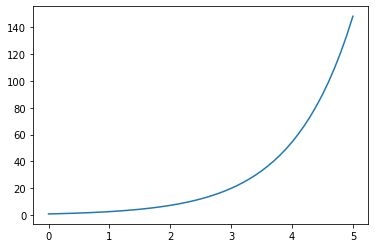

In [29]:
# plot solution
U = milne(u0,for_step(u0,k1), k1,5)
plt.plot([k1*i for i in range(int(5/k1)+1)] , U)
plt.show()

#### Error at $t=5$

In [41]:
# error at time t=5
print("Absolute Error at t=5 for u' = u with stepsize k = : " + str(k1) + " : " + str(error(u0,for_step(u0,k1), k1,5)) )
print("Relative Error at t=5 for u' = u with stepsize k = : " + str(k1) + " : " + \
                                                                      str(error(u0,for_step(u0,k1), k1,5) / math.e**5) )
print("Absolute Error at t=5 for u' = u with stepsize k = : " + str(k2) + " : " + str(error(u0,for_step(u0,k2), k2,5)) )
print("Relative Error at t=5 for u' = u with stepsize k = : " + str(k2) + " : " + \
                                                                      str(error(u0,for_step(u0,k2), k2,5) / math.e**5) )

Absolute Error at t=5 for u' = u with stepsize k = : 0.1 : 0.3694307319877339
Relative Error at t=5 for u' = u with stepsize k = : 0.1 : 0.0024892046919666997
Absolute Error at t=5 for u' = u with stepsize k = : 0.01 : 0.0037054937544667155
Relative Error at t=5 for u' = u with stepsize k = : 0.01 : 2.496742052303895e-05


## Milne's Method for the system  $u' = -u \,,\,\, u(0)=1$

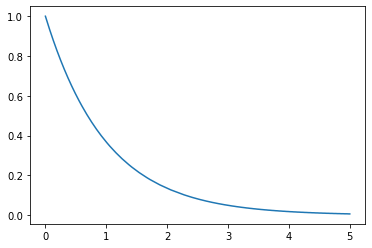

In [31]:
# plot solution
V = milne(u0, back_step(u0,k2,-1), k2, t=5, _lam = -1)
plt.plot([k2*i for i in range(int(5/k2)+1)] , V)
plt.show()

#### Error at $t=5$

In [33]:
print("Absolute Error at t=5 for u' = -u with stepsize k = : " + str(k1) + " : " + \
                                  str(error(u0,back_step(u0,k1,-1),k1,t=5,_lam=-1)) )
print("Relative Error at t=5 for u' = -u with stepsize k = : " + str(k1) + " : " + \
                                  str(error(u0,back_step(u0,k1,-1),k1,t=5,_lam=-1) / math.e**(-5)) )
print("Absolute Error at t=5 for u' = -u with stepsize k = : " + str(k2) + " : " + \
                                  str(error(u0,back_step(u0,k2,-1), k2,t=5,_lam=-1)) )
print("Relative Error at t=5 for u' = -u with stepsize k = : " + str(k2) + " : " + \
                                  str(error(u0,back_step(u0,k2,-1), k2,t=5,_lam=-1) / math.e**(-5)) )

Absolute Error at t=5 for u' = -u with stepsize k = : 0.1 : 0.011587086813777205
Relative Error at t=5 for u' = -u with stepsize k = : 0.1 : 1.7196761588284832
Absolute Error at t=5 for u' = -u with stepsize k = : 0.01 : 0.00013044525238188782
Relative Error at t=5 for u' = -u with stepsize k = : 0.01 : 0.019359791995928872


## Discussion

We see that the error in these equations seems to be of order $k^2$ as the error decreases by a factor of about 1/100 when $k$ decreases by a factor of about 1/10. This is in contrast with the expected $k^4$ order error expected. The discrepancy comes because we are using forward Euler to initialize the method. This is a has an order of $k^2$ error in the initial condition and this error gets propagated throughout the solution as we march forward with the numerical method, leading to a worse approximation than we expected.